In [19]:
import numpy as np
import pandas as pd
from astropy.io import fits
import matplotlib.pyplot as plt 
from photutils.background import Background2D, MedianBackground
from astropy.stats import SigmaClip
from photutils.segmentation import SegmentationImage
from photutils.segmentation import (detect_sources, make_2dgaussian_kernel,
                                        SourceCatalog, deblend_sources)
from scipy.ndimage import convolve
# remove_masked_labels(mask, partial_overlap=True, relabel=False)

In [3]:
example = fits.open("/media/bekah/BekahA/background_test/pics_and_photonlists/e4356_FUV_threshold_10_31.fits")

In [32]:
# estimating background with convolved count image 

cnt_image = example[1].data 
threshold = example[3].data 
seg = example[2].data 

kernel = make_2dgaussian_kernel(fwhm=3, size=(3, 3))

convolved_data = convolve(cnt_image, kernel)
    
sigma_clip = SigmaClip(sigma=3.)
bkg_estimator = MedianBackground()
bkg = Background2D(convolved_data,
                               (50, 50),
                               filter_size=(3, 3),
                               bkg_estimator=bkg_estimator,
                               sigma_clip=sigma_clip)

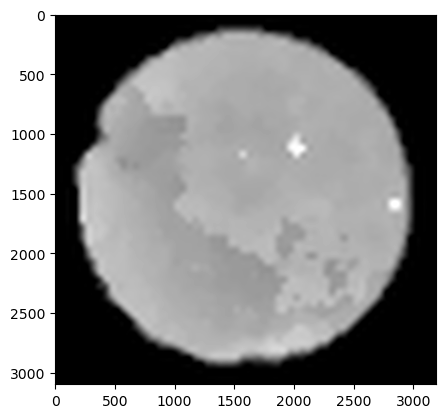

In [58]:
plt.imshow(bkg.background, cmap='grey', interpolation=None)

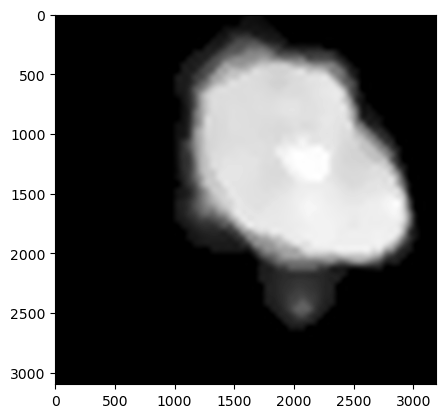

In [57]:
plt.imshow(threshold, cmap='grey', interpolation=None)

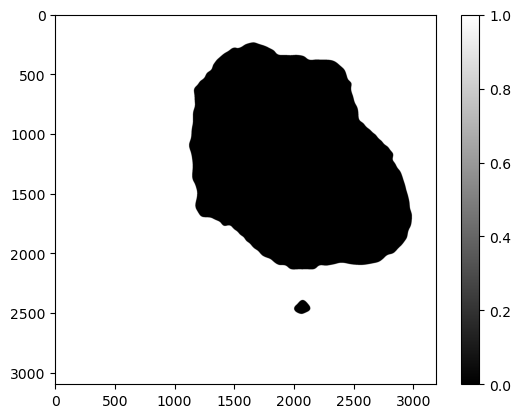

In [56]:
mask = threshold < .0005
plt.imshow(mask, interpolation = None, cmap='grey')
plt.colorbar()

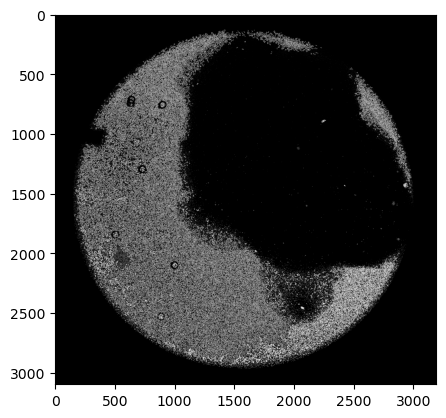

In [55]:
plt.imshow(seg , cmap='grey', interpolation=None)

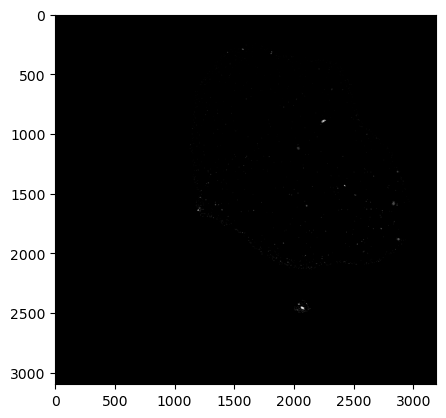

In [54]:
# remove masked labels, returned eclipse has all the "problematic" sources gone 

segm = SegmentationImage(seg)

segm.remove_masked_labels(mask, partial_overlap=True, relabel=False)

plt.imshow(segm, cmap='grey', interpolation=None)